In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
cnx= mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",
    password="@@@@@@@@@@@@@",
    database="edamysql")

In [3]:
df=pd.read_sql_query("select * from student_marks",cnx)
df

,name,gender,DOB,maths,physics,chemistry,english,biology,econommics,history,civics
0,John,M,1988-05-04,55,45,56,87,21,52,89,65
1,Suresh,M,1987-04-05,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-12-08,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-02-09,58,96,78,46,96,77,83,53
5,Annu,F,1988-05-04,45,87,52,89,55,89,87,52
6,pooja,F,1987-04-05,55,64,61,58,75,58,64,61
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
8,Farha,F,1990-08-12,55,63,89,75,78,75,63,89
9,Mukesh,M,1989-02-09,96,46,77,83,58,83,46,77


In [4]:
df.head()

,name,gender,DOB,maths,physics,chemistry,english,biology,econommics,history,civics
0,John,M,1988-05-04,55,45,56,87,21,52,89,65
1,Suresh,M,1987-04-05,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-12-08,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-02-09,58,96,78,46,96,77,83,53


In [5]:
df.shape

(10, 11)

In [6]:
df.dtypes

name          object
gender        object
DOB           object
maths          int64
physics        int64
chemistry      int64
english        int64
biology        int64
econommics     int64
history        int64
civics         int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        10 non-null     object
 1   gender      10 non-null     object
 2   DOB         10 non-null     object
 3   maths       10 non-null     int64 
 4   physics     10 non-null     int64 
 5   chemistry   10 non-null     int64 
 6   english     10 non-null     int64 
 7   biology     10 non-null     int64 
 8   econommics  10 non-null     int64 
 9   history     10 non-null     int64 
 10  civics      10 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 1008.0+ bytes


In [8]:
df.columns

Index(['name', 'gender', 'DOB', 'maths', 'physics', 'chemistry', 'english',
       'biology', 'econommics', 'history', 'civics'],
      dtype='object')

In [9]:
df.isnull().sum()

name          0
gender        0
DOB           0
maths         0
physics       0
chemistry     0
english       0
biology       0
econommics    0
history       0
civics        0
dtype: int64

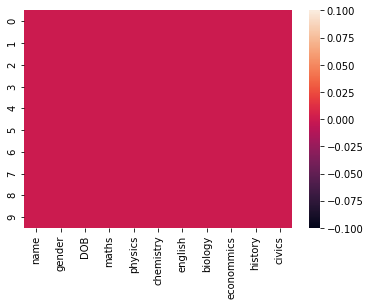

In [10]:
sns.heatmap(df.isnull())
plt.show()

In [11]:
totalmarks=df['maths']+df['physics']+df['chemistry']+df['english']+df['biology']+df['econommics']+df['history']+df['civics']
df['totalmarks']=totalmarks
df.head()

,name,gender,DOB,maths,physics,chemistry,english,biology,econommics,history,civics,totalmarks
0,John,M,1988-05-04,55,45,56,87,21,52,89,65,470
1,Suresh,M,1987-04-05,75,96,78,64,90,61,58,2,524
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74,556
3,Jessica,F,1990-12-08,78,96,86,63,54,89,75,45,586
4,Jennifer,F,1989-02-09,58,96,78,46,96,77,83,53,587


In [12]:
cf=[]
nf=[] 
for fea in df.columns:
    if df[fea].dtype == 'O':
            cf.append(fea)
    else:
            nf.append(fea)
print(cf)
print('\n',nf)

['name', 'gender', 'DOB']

 ['maths', 'physics', 'chemistry', 'english', 'biology', 'econommics', 'history', 'civics', 'totalmarks']


In [13]:
df.describe()

,maths,physics,chemistry,english,biology,econommics,history,civics,totalmarks
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000,10.00000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000,544.50000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432,41.01558
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000,470.00000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500,518.75000
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000,556.00000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500,581.00000
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000,587.00000


In [14]:
df.describe(include = ['O'])

,name,gender,DOB
count,10,10,10
unique,10,2,6
top,Mukesh,M,1989-02-09
freq,1,5,2


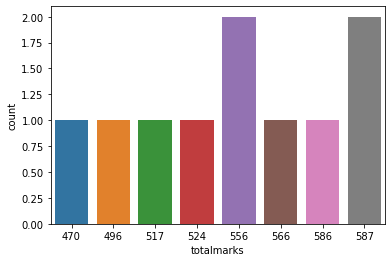

In [15]:
#Data visualisation
#univariate analysis
sns.countplot(df['totalmarks'])
plt.show()

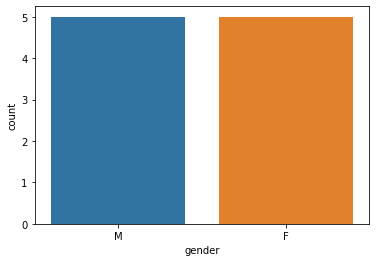

In [16]:
sns.countplot(df['gender'])
plt.show()

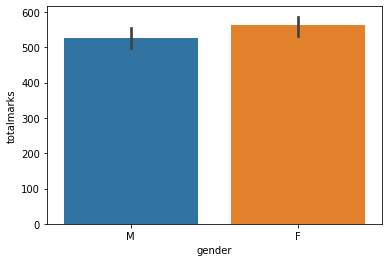

In [17]:
#bivariate analysis
sns.barplot(x='gender',y='totalmarks',data=df) 
plt.show()

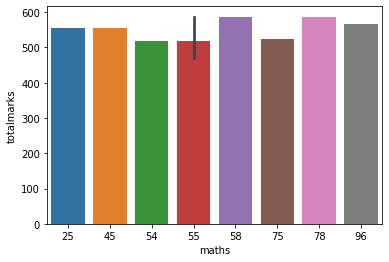

In [18]:
sns.barplot(x='maths',y='totalmarks',data=df) 
plt.show()

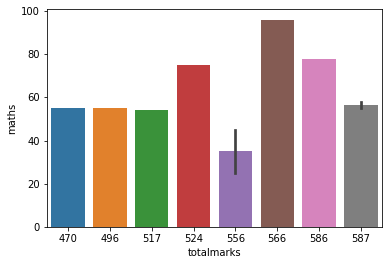

In [19]:
sns.barplot(x='totalmarks',y='maths',data=df) 
plt.show()

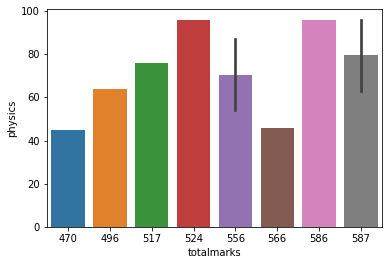

In [20]:
sns.barplot(x='totalmarks',y='physics',data=df) 
plt.show()

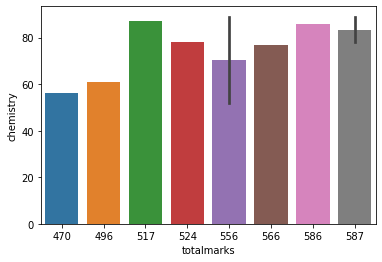

In [21]:
sns.barplot(x='totalmarks',y='chemistry',data=df) 
plt.show()

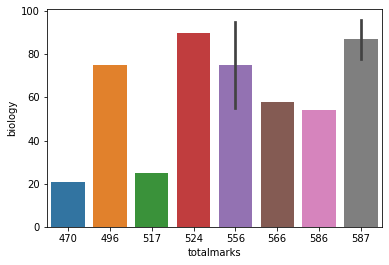

In [22]:
sns.barplot(x='totalmarks',y='biology',data=df) 
plt.show()

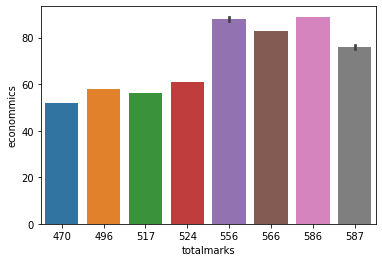

In [23]:
sns.barplot(x='totalmarks',y='econommics',data=df) 
plt.show()

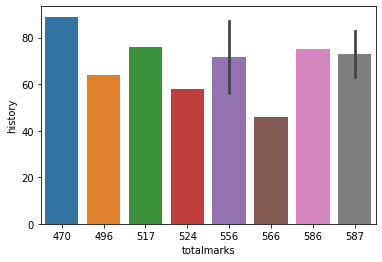

In [24]:
sns.barplot(x='totalmarks',y='history',data=df) 
plt.show()

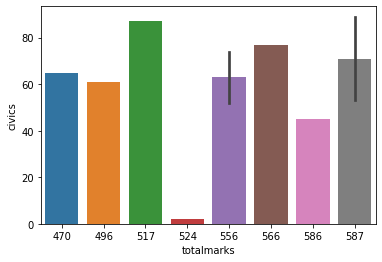

In [25]:
sns.barplot(x='totalmarks',y='civics',data=df) 
plt.show()

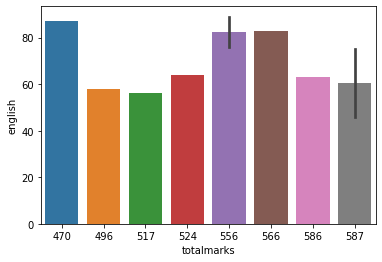

In [26]:
sns.barplot(x='totalmarks',y='english',data=df) 
plt.show()

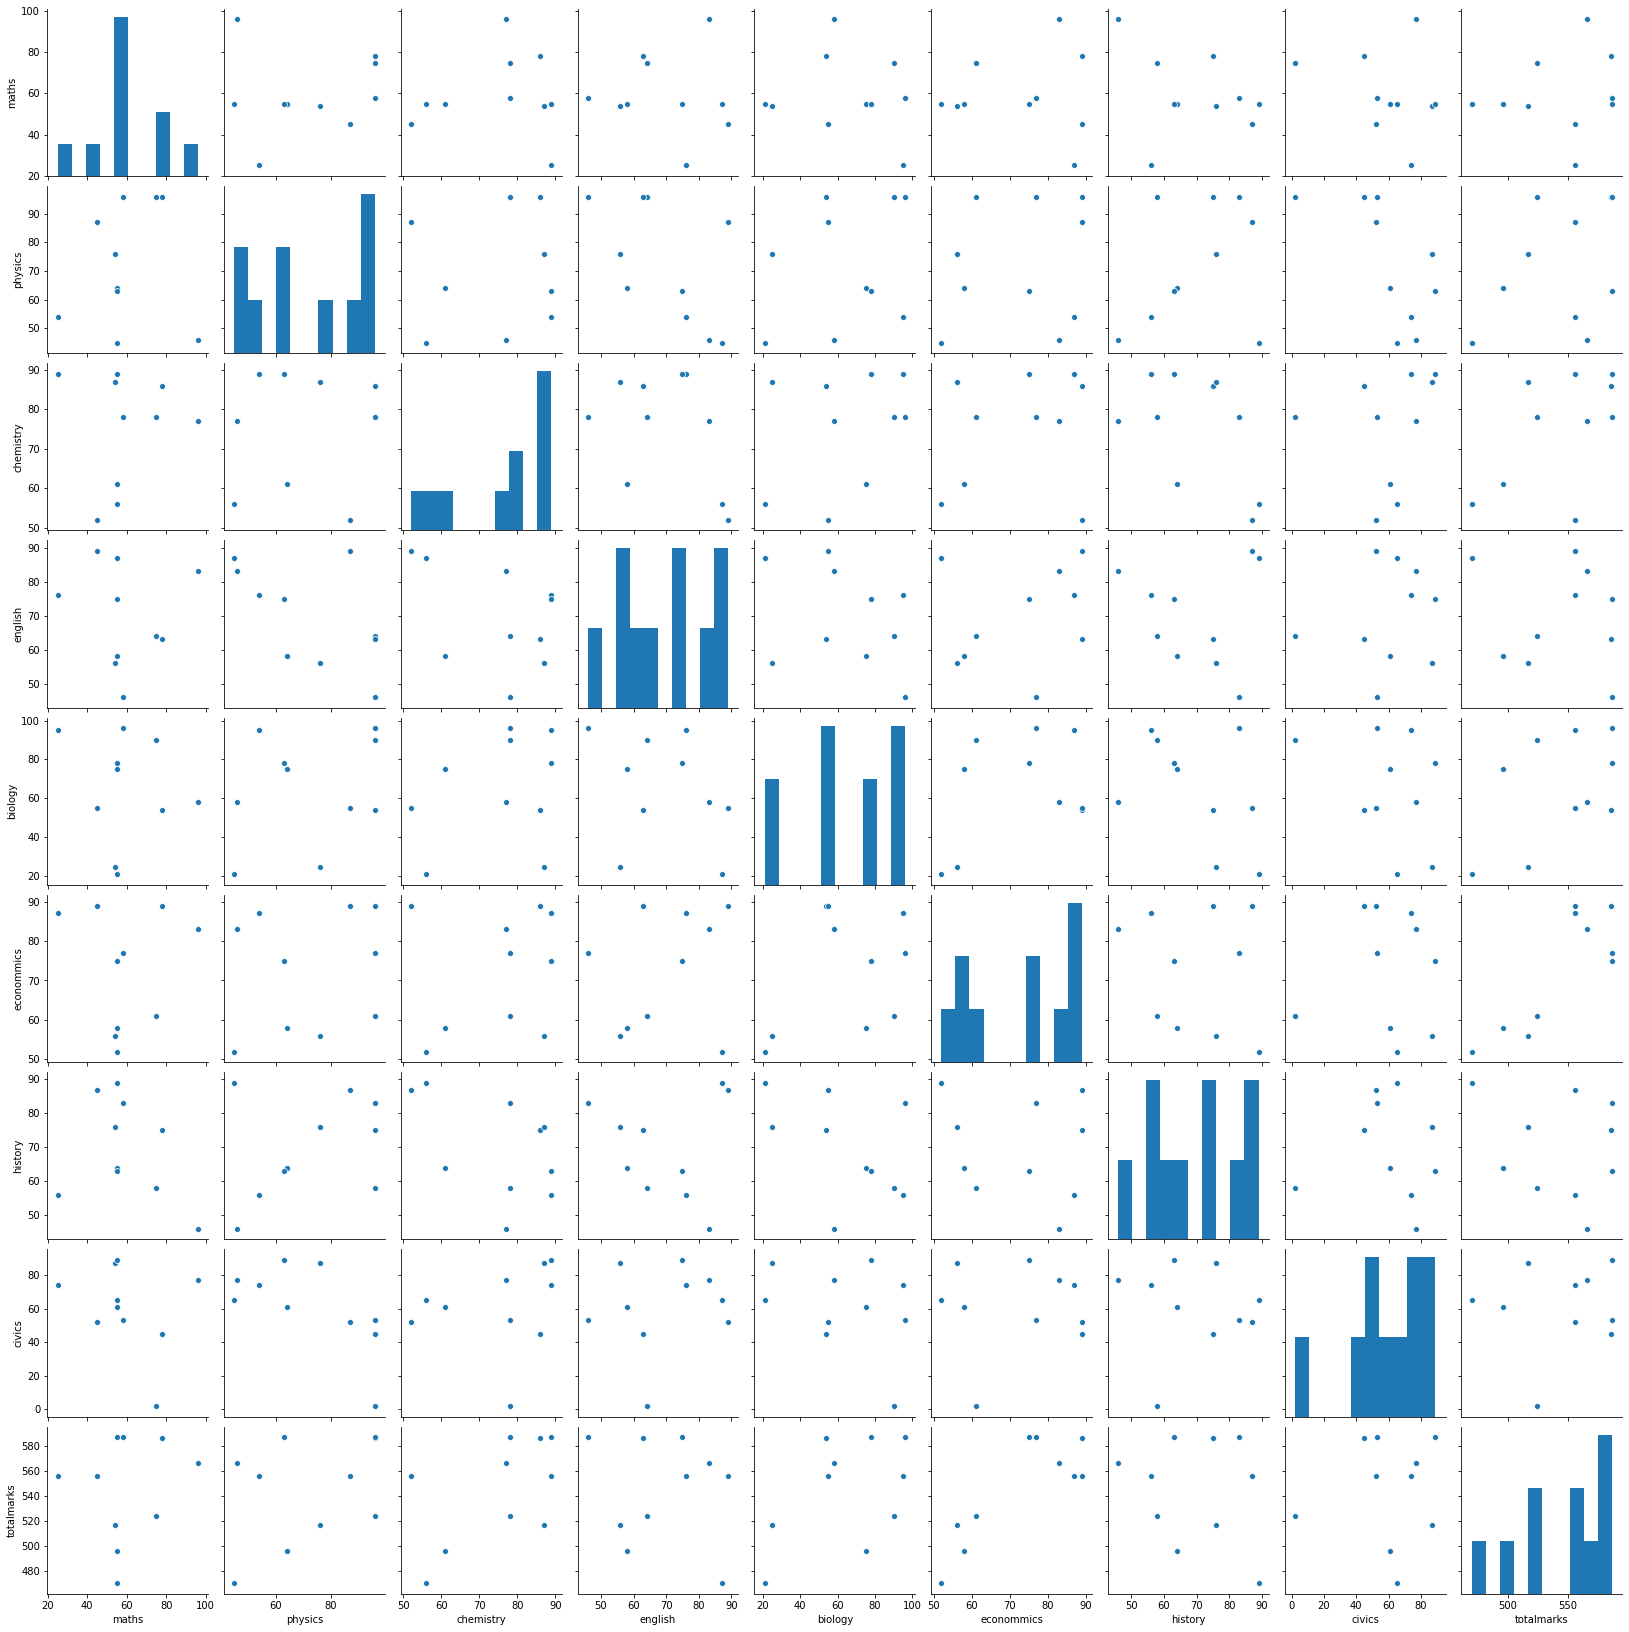

In [27]:
sns.pairplot(df)

In [28]:
df.corr()

,maths,physics,chemistry,english,biology,econommics,history,civics,totalmarks
maths,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629,0.156049
physics,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266,0.372033
chemistry,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908,0.545944
english,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705,-0.132607
biology,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060,0.489008
econommics,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905,0.830433
history,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686,-0.199145
civics,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000,0.082574
totalmarks,0.156049,0.372033,0.545944,-0.132607,0.489008,0.830433,-0.199145,0.082574,1.000000


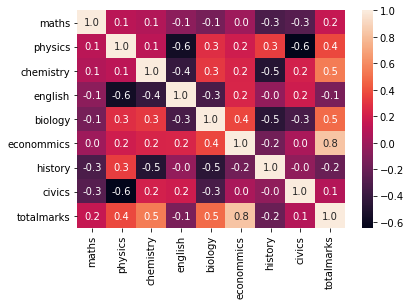

In [29]:
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()